In [2]:
using DifferentialEquations
using Plots

In [11]:
function fill_map(x,y,map,size)
    for i in 1:size
        pos_i=pos_values(i,size)
        for j in 1:size
            pos_j=pos_values(j,size)
            fill_pos(pos_i,pos_j,x,y,map,i,j,size)
        end
    end
end
function fill_values(x,y,r_ij,i,j,size)
    istrue=true
    n=1
    value=0
    while istrue && n<size-1
        if r_ij-x[n]<=x[n]
            value=y[n]
            istrue=false
        else
            n+=1
        end 
    end 
    return value
end 
function fill_pos(pos_i,pos_j,x,y,map,i,j,size)
    for ii in pos_i
        for jj in pos_j
            r_ij=(x[i]^2+x[j]^2)^(1/2)
            map[ii,jj]=fill_values(x,y,r_ij,i,j,size)
        end 
    end
end
function pos_values(pos,size)
    return [size-pos+1,size+pos]
end 

pos_values (generic function with 1 method)

In [4]:
function obtain_size(x)
    size=0
    for i in x
        size+=1
    end
    return size
end 

obtain_size (generic function with 1 method)

In [5]:
function solve_PDE(model)
    y = solve(model, Vern9(), abs_tol=1e-16, rel_tol=1e-16)
    x_sol=convert(Array,y.t)
    y_sol=convert(Array,y)[1,:]
    size=obtain_size(y_sol)
    return x_sol,y_sol,size
end 

solve_PDE (generic function with 1 method)

In [13]:
function plot_graphics(x_sol,y_sol,size)
    map=zeros(2*size,2*size)
    r=2^(1/2)*x_sol
    fill_map(r,y_sol,map,size)
    color_map=heatmap(1:2*size,1:2*size,map,color=cgrad(:inferno))
    radial_function=plot(x_sol,y_sol)
    plot(radial_function,color_map)
end

plot_graphics (generic function with 1 method)

In [7]:
function df(du,u,p,y)
    k=1
    du[1]=u[2]
    du[2]=-u[2]/y-k^2*u[1]
end

df (generic function with 1 method)

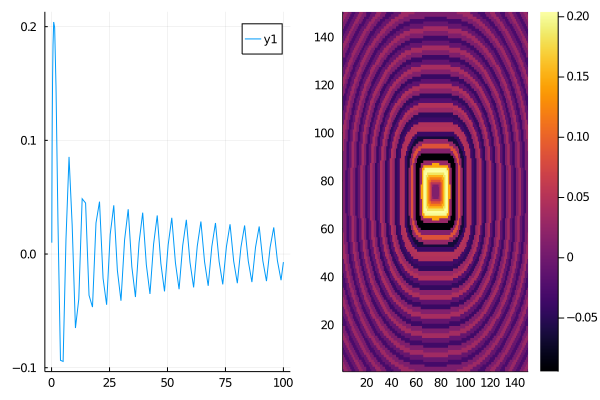

In [14]:
u0=[0.01,1]
min_value,max_value=0.1,100
model = ODEProblem(df,u0,(min_value,max_value))
x_sol,y_sol,size=solve_PDE(model)
plot_graphics(x_sol,y_sol,size)